## Background

Zillow’s Zestimate home valuation has shaken up the U.S. real estate industry since first released 11 years ago.

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important. The Zestimate was created to give consumers as much information as possible about homes and the housing market, marking the first time consumers had access to this type of home value information at no cost.

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today), Zillow has since become established as one of the largest, most trusted marketplaces for real estate information in the U.S. and a leading example of impactful machine learning.

### Objective:

Build a model to improve the Zestimate residual error. 

### Client

In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

#### Reading the dataset

In [114]:
train=pd.read_csv('C:/Users/Lenovo/Downloads/all/train_2016_v2.csv')
properties=pd.read_csv('C:/Users/Lenovo/Downloads/all/properties_2016.csv')

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [115]:
train.columns

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')

In [116]:
properties.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [117]:
train_merge = pd.merge(train,properties,on="parcelid",how="left")
train_merge.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


### Data wrangling:

In [118]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15        

It looks like lot of columns has misssing value. We need to do more investigation on whether to retain the columns or discard them.

In [119]:
missing_df = train_merge.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_merge.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.999]



C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,column_name,missing_count,missing_ratio
5,basementsqft,90232,0.999524
8,buildingclasstypeid,90259,0.999823
15,finishedsquarefeet13,90242,0.999634
43,storytypeid,90232,0.999524


Four columns have 99.9% missing values.

Lets get statistical summary for the categorical or string variables:

In [130]:
good_features=missing_df['column_name'].ix[missing_df['missing_ratio']<0.75]


In [121]:
describe = train_merge.describe(include=['O']).transpose().reset_index()
describe.columns = ['Categorical Feature','count', 'unique', 'top', 'freq']
describe

,Categorical Feature,count,unique,top,freq
0,transactiondate,90275,352,2016-07-29,910
1,hashottuborspa,2365,1,True,2365
2,propertycountylandusecode,90274,77,0100,30846
3,propertyzoningdesc,58313,1996,LAR1,7678
4,fireplaceflag,222,1,True,222
5,taxdelinquencyflag,1783,1,Y,1783


C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


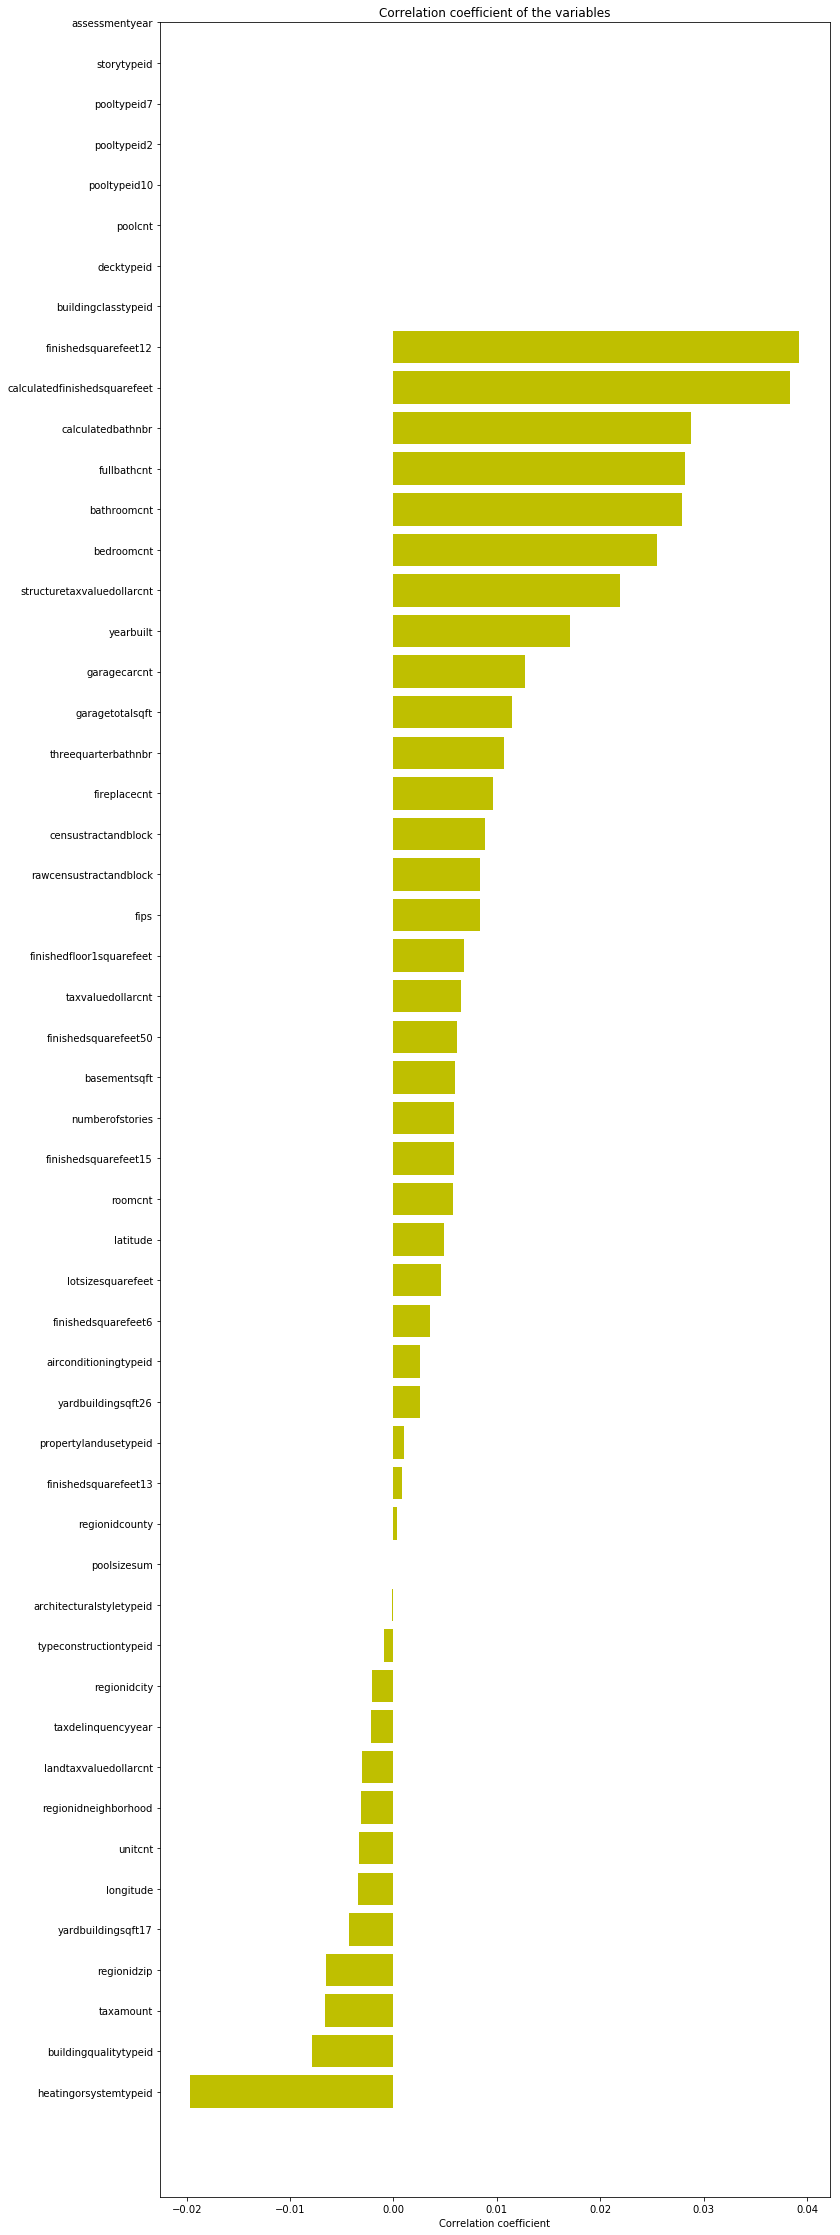

In [129]:
# Let us just impute the missing values with mean values to compute correlation coefficients #
mean_values = train_merge.mean(axis=0)
train_merge_new=train_merge.fillna(mean_values, inplace=True)

x_cols = [col for col in train_merge.columns if col not in ['logerror'] if train_merge[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_merge[col].values, train_merge.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

The correlation of the target variable with the given set of variables are low overall.

There are few variables at the top of this graph without any correlation values. I guess they have only one unique value and hence no correlation value. Let us confirm the same.

In [131]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
for col in corr_zero_cols:
    print(col, len(train_merge[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


lets analyze features with moderate correlation.

In [134]:
imp_features=corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
imp_features

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,col_labels,corr_values
21,heatingorsystemtypeid,-0.019648
45,structuretaxvaluedollarcnt,0.021935
4,bedroomcnt,0.025467
3,bathroomcnt,0.027889
18,fullbathcnt,0.028169
7,calculatedbathnbr,0.028758
10,calculatedfinishedsquarefeet,0.038341
11,finishedsquarefeet12,0.039248


,heatingorsystemtypeid,structuretaxvaluedollarcnt,bedroomcnt,bathroomcnt,fullbathcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12
heatingorsystemtypeid,1.000000,-0.157632,-0.129769,-0.249349,-0.273912,-0.257890,-0.189426,-0.197961
structuretaxvaluedollarcnt,-0.157632,1.000000,0.301622,0.581032,0.585495,0.604527,0.709404,0.727240
bedroomcnt,-0.129769,0.301622,1.000000,0.646120,0.585935,0.590046,0.615998,0.560120
bathroomcnt,-0.249349,0.581032,0.646120,1.000000,0.950312,0.965636,0.757887,0.731641
fullbathcnt,-0.273912,0.585495,0.585935,0.950312,1.000000,0.984130,0.774520,0.734254
calculatedbathnbr,-0.257890,0.604527,0.590046,0.965636,0.984130,1.000000,0.795247,0.758691
calculatedfinishedsquarefeet,-0.189426,0.709404,0.615998,0.757887,0.774520,0.795247,1.000000,0.958138
finishedsquarefeet12,-0.197961,0.727240,0.560120,0.731641,0.734254,0.758691,0.958138,1.000000


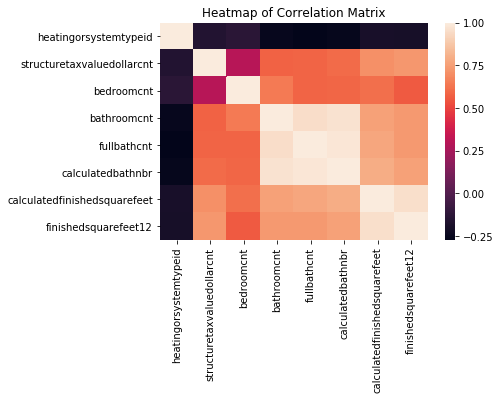

In [139]:
imp_columns = imp_features.col_labels.tolist()
corr_df=train_merge[imp_columns]

corr=corr_df.corr()
corr = (corr)
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

In [ ]:
Important variables are highly correlated.

'logerror' is the target variable for our prediction. So lets analyze this.

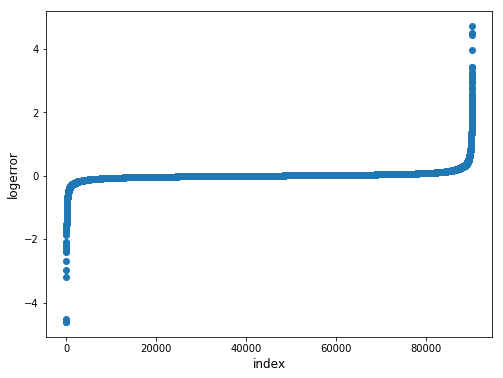

In [140]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_merge.shape[0]), np.sort(train_merge.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

Scatter plot for the dependent variable shows there are outliers in the data. Lets plot the histogram to visualize the distribution.

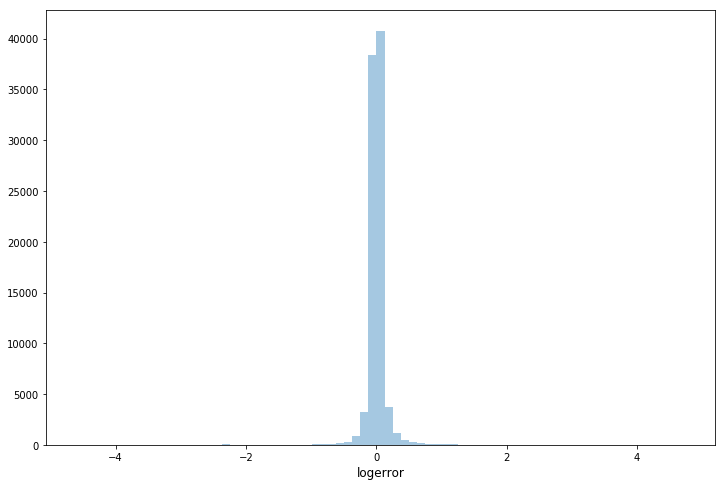

In [141]:

plt.figure(figsize=(12,8))
sns.distplot(train_merge.logerror.values, bins=75, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

'logerror' is normally distributed.

#### Analyzing transactiondate

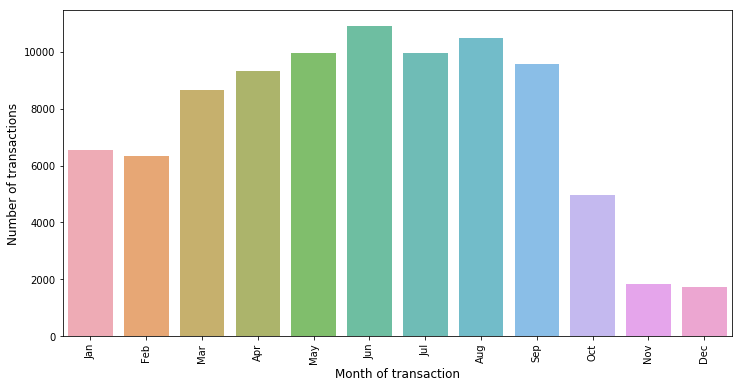

In [142]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # for ordering in graph
train_merge['transaction_month'] = train_merge['transactiondate'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
month_df = pd.DataFrame(train_merge['transaction_month'].value_counts()).reset_index()
month_df.columns = ['transaction_month', 'count']
plt.figure(figsize=(12,6))
sns.barplot(x='transaction_month', y='count', data=month_df,alpha=0.8, order=month_order)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of transactions', fontsize=12)
plt.show()

Most of the data in the train set is before October 15, 2016, which can be seen in the graph as well.